In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
ls

Mod 4 project 2.ipynb
classification-assessment-mini-project.ipynb*
classification_lab_data.csv*


In [74]:
df = pd.read_csv('classification_lab_data.csv')

In [75]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0


In [76]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,167825.729405,1.603608,1.856786,1.550773,35.523230,-0.014959,-0.134839,-0.165632,-0.217092,-0.261344,-0.285845,51589.034710,49521.698112,4.747483e+04,43796.589775,40748.049169,39226.852411,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943,0.221176
std,129915.115993,0.489158,0.791939,0.522431,9.253986,1.120903,1.193044,1.193515,1.168719,1.133016,1.150394,74104.132627,71551.215125,7.001082e+04,64927.450125,61257.537699,60075.536736,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322,0.415047
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-67526.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3577.500000,2958.000000,2.718000e+03,2392.500000,1801.000000,1280.000000,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22472.000000,21290.000000,2.022300e+04,19145.000000,18227.000000,17175.000000,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67767.000000,64635.500000,6.096200e+04,55418.000000,50581.000000,49434.500000,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 24 columns):
LIMIT_BAL                     23999 non-null int64
SEX                           23999 non-null int64
EDUCATION                     23999 non-null int64
MARRIAGE                      23999 non-null int64
AGE                           23999 non-null int64
PAY_0                         23999 non-null int64
PAY_2                         23999 non-null int64
PAY_3                         23999 non-null int64
PAY_4                         23999 non-null int64
PAY_5                         23999 non-null int64
PAY_6                         23999 non-null int64
BILL_AMT1                     23999 non-null int64
BILL_AMT2                     23999 non-null int64
BILL_AMT3                     23999 non-null int64
BILL_AMT4                     23999 non-null int64
BILL_AMT5                     23999 non-null int64
BILL_AMT6                     23999 non-null int64
PAY_AMT1                

In [78]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [79]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [80]:
target = df['default payment next month']
features = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [81]:
features.shape

(23999, 23)

In [82]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, features, target, scoring="r2", cv=crossvalidation))
baseline

0.12084229644350444

In [83]:
df.rename(columns = {'default payment next month':'default_payment'}, inplace = True)

In [84]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment'],
      dtype='object')

In [85]:
from statsmodels.formula.api import ols
predictors = '+'.join(features.columns)
formula = 'default_payment' + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        default_payment   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     146.1
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:26:25   Log-Likelihood:                -11375.
No. Observations:               23999   AIC:                         2.280e+04
Df Residuals:                   23975   BIC:                         2.299e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3123      0.020     15.643      0.000       0.273       0.351
LIMIT_BAL  -1.008e-07   2.41e-08     -4.176      0.000   -1.48e-07   -5.35e-08
SEX           -0.0143      0.005     -2.762      0.006      -0.025      -0.004
EDUCATION     -0.0144      0.003     -4.277      0.000      -0.021      -0.008
MARRIAGE      -0.0223      0.005     -4.186      0.000      -0.033      -0.012
AGE            0.0013      0.000      4.265      0.000       0.001       0.002
PAY_0          0.0959      0.003     30.991      0.000       0.090       0.102
PAY_2          0.0180      0.004      4.799      0.000       0.011       0.025
PAY_3          0.0140      0.004      3.490      0.000       0.006       0.022
PAY_4          0.0056      0.004      1.260      0.208      -0.003       0.014
PAY_5          0.0022      0.005      0.459      0.646      -0.007       0.012
PAY_6          0.0005      0.004      0.136      0.892      -0.007       0.008
BILL_AMT1  -5.467e-07   1.27e-07     -4.309      0.000   -7.95e-07   -2.98e-07
BILL_AMT2   1.334e-07    1.8e-07      0.740      0.459    -2.2e-07    4.87e-07
BILL_AMT3  -8.781e-09   1.72e-07     -0.051      0.959   -3.45e-07    3.27e-07
BILL_AMT4  -3.118e-09    1.8e-07     -0.017      0.986   -3.55e-07    3.49e-07
BILL_AMT5   2.203e-10   2.04e-07      0.001      0.999      -4e-07    4.01e-07
BILL_AMT6    5.03e-08   1.59e-07      0.316      0.752   -2.62e-07    3.62e-07
PAY_AMT1   -7.928e-07   1.97e-07     -4.017      0.000   -1.18e-06   -4.06e-07
PAY_AMT2   -1.126e-07   1.58e-07     -0.712      0.476   -4.22e-07    1.97e-07
PAY_AMT3   -3.735e-10   1.91e-07     -0.002      0.998   -3.76e-07    3.75e-07
PAY_AMT4    -2.05e-07   2.09e-07     -0.982      0.326   -6.14e-07    2.04e-07
PAY_AMT5   -2.628e-07   2.08e-07     -1.264      0.206    -6.7e-07    1.45e-07
PAY_AMT6   -9.157e-08   1.54e-07     -0.596      0.551   -3.93e-07    2.09e-07
==============================================================================
Omnibus:                     3769.361   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5880.600
Skew:                           1.209   Prob(JB):                         0.00
Kurtosis:                       3.175   Cond. No.                     2.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
import seaborn as sns

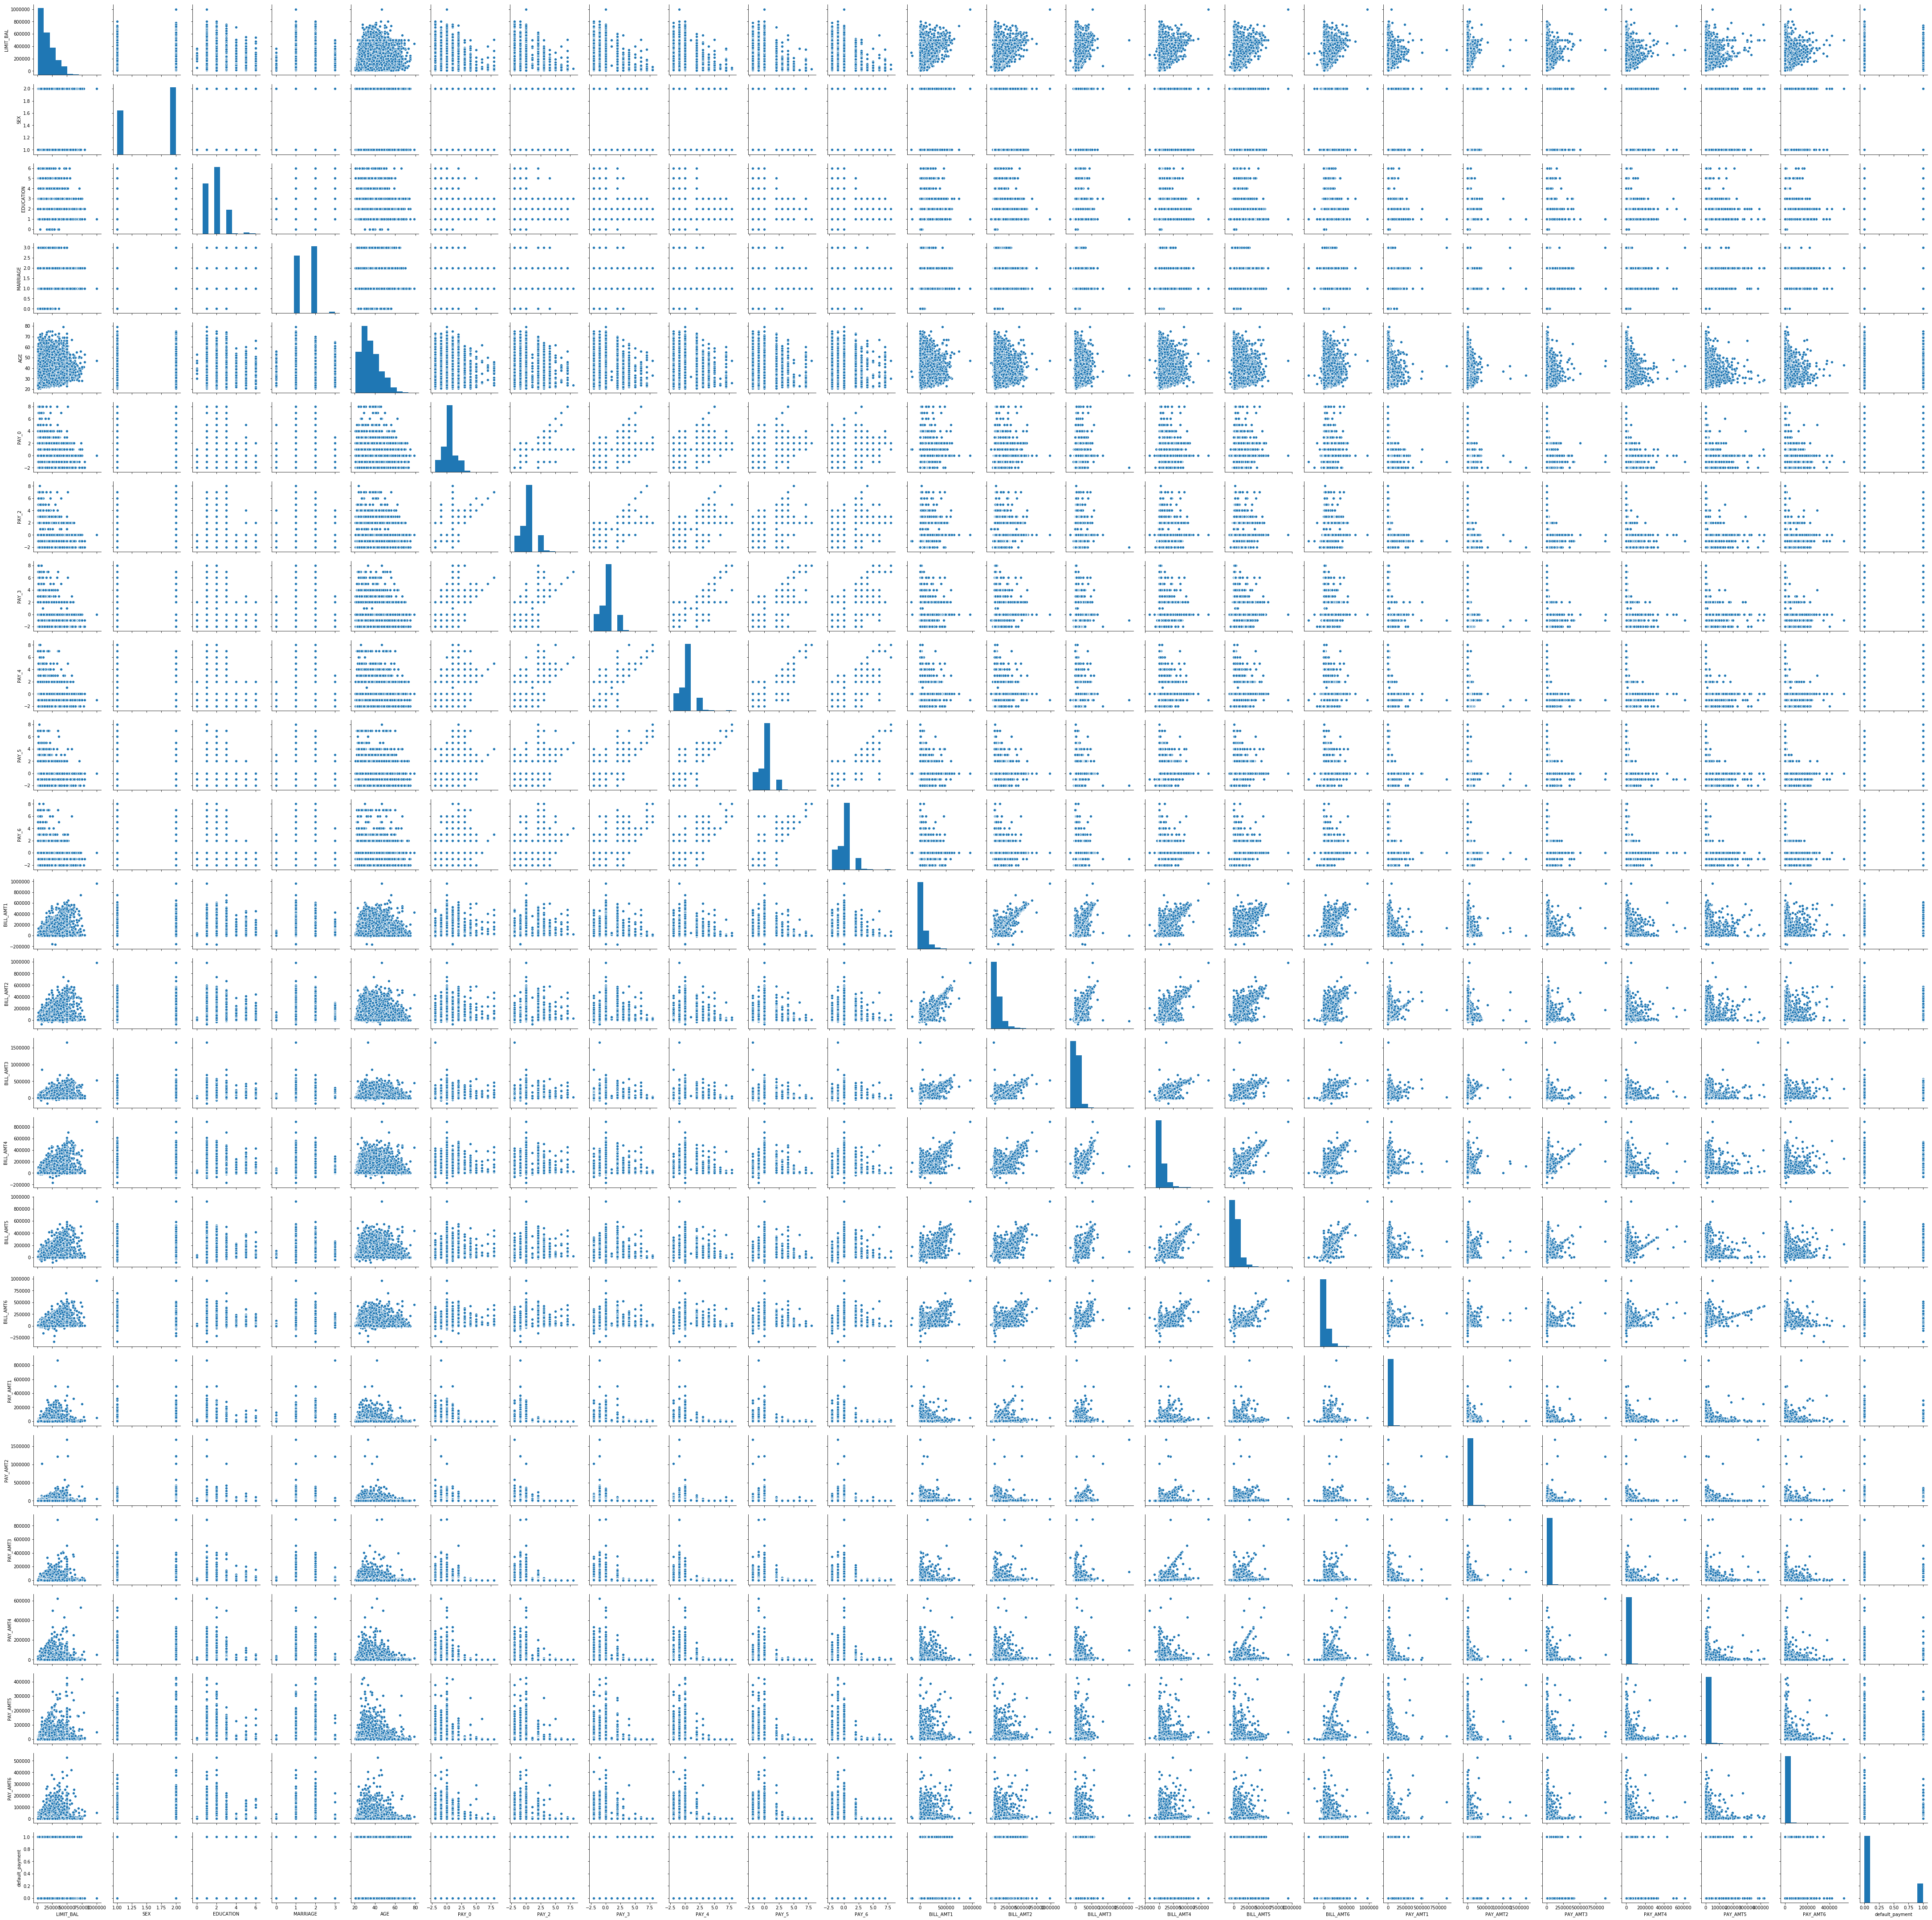

In [44]:
sns.pairplot(df)

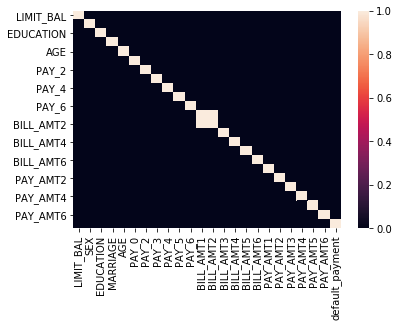

In [45]:
sns.heatmap(df.corr().abs()>0.95)

High p-value suggests there's high colinearity. We are going to remove the feature with the highest p-value: PAY_AMT3

In [47]:
pd.set_option('display.max_columns', 500)

In [73]:
df.head(15)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,OUTSTANDING_1,OUTSTANDING_2,OUTSTANDING_3,OUTSTANDING_4,OUTSTANDING_5,OUTSTANDING_6
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,87379,87863,89706,83880,96254,98524
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,18886,20206,17273,16052,13170,9714
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,128711,125664,98311,74099,54938,37934
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0,19762,23944,26388,22237,18131,13674
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0,13056,14344,14753,17020,17041,17285
5,150000,2,1,1,46,0,0,0,0,0,0,21787,22817,24134,24635,29032,29766,1382,1699,1200,5000,1214,1500,0,20405,21118,22934,19635,27818,28266
6,400000,2,2,2,41,-2,-2,-2,-2,-2,-2,43672,678,330,330,330,330,678,330,330,330,330,330,1,42994,348,0,0,0,0
7,360000,2,2,2,31,0,-1,-1,-1,-2,-2,3386,5964,1340,1650,4350,4792,5964,1340,1650,4350,4792,40682,0,-2578,4624,-310,-2700,-442,-35890
8,160000,2,2,2,32,2,2,2,2,-1,0,400,400,400,0,20818,20818,0,0,0,20818,0,0,0,400,400,400,-20818,20818,20818
9,500000,2,1,1,44,0,-1,-1,0,0,0,329570,71921,367979,294969,189612,128459,72001,368199,6486,234,90,167116,0,257569,-296278,361493,294735,189522,-38657


## The payment are made for the previous month bill; Therefore, PAY_AMT5 is the payment of BILL_AMT6 and so on.
### 1 = Sept   2= Aug   3 = Jul   4 = June   5= May   6 = April
### Payment in May is made for Bill in April, resulting in outstanding in May ==> BILL_AMT6 - PAY_AMT5 = OUTSTANDING_5
### OUTSTANDING in may + amount spent in May  = Bill amount in may = BILL_AMT5
### ==> SPENT5 = BILL_AMT5 - OUTSTANDING5

In [88]:
#Calculating outstanding amount
for i in range(1,6):
    df['OUTSTANDING_{}'.format(i)] = df['BILL_AMT{}'.format(i+1)]- df['PAY_AMT{}'.format(i)]

In [87]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,OUTSTANDING_1,OUTSTANDING_2,OUTSTANDING_3,OUTSTANDING_4,OUTSTANDING_5
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,87795,89525,91277,89418,98228
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,20199,17273,14469,14253,9714
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,99796,97589,73289,54138,37334
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0,21944,24988,24637,19131,9774
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0,14064,15064,16064,17064,17412


In [60]:
df['SEX'].unique()

array([1, 2])

### Sex :
1 = Male
2 = Female

In [72]:
df[df['MARRIAGE'] == 0]['MARRIAGE'].count()

43